In [2]:
files = ! ls Demo/subtitles/

subs = [open('Demo/subtitles/'+item).read().decode('utf-8').split() for item in files ]


#replace('\r','').replace('\n\n','\n')
print files



['Game.of.Thrones.S06E01.HDTV.en.srt', 'Game.of.Thrones.S06E02.HDTV.en.srt', 'Game.of.Thrones.S06E03.HDTV.RMTeam.en.srt', 'Game.of.Thrones.S06E04.HDTV.en.srt', 'Game.of.Thrones.S06E05.HDTV.FUM.en.srt', 'Game.of.Thrones.S06E06.HDTV.KILLERS-AVS.en.srt', 'Game.of.Thrones.S06E07.HDTV.en.srt', 'Game.of.Thrones.S06E08.HDTV.12-06-2016.en..srt', 'Game.of.Thrones.S06E09.HDTV.en..srt', 'Game.of.Thrones.S06E10.HDTV.AVS.en..srt']


In [3]:
print len(subs)

print subs[0][80:180]

10
[u'-->', u'00:03:01,860', u'<i>(howling', u'continues)</i>', u'13', u'00:03:01,945', u'-->', u'00:03:06,081', u'<i>(Ghost', u'whimpering,', u'howling)</i>', u'14', u'00:03:06,166', u'-->', u'00:03:10,785', u'<i>-', u'(rattling', u'continues)', u'-', u'(whimpering,', u'howling', u'continue)</i>', u'15', u'00:03:25,635', u'-->', u'00:03:27,769', u'Man:', u"<i>It's", u'coming', u'from', u'the', u'courtyard.</i>', u'16', u'00:03:32,943', u'-->', u'00:03:35,276', u'-', u'<i>(Ghost', u'howling)</i>', u'-', u'Man', u'#2:', u"It's", u'the', u'Lord', u'Commander!', u'17', u'00:03:48,542', u'-->', u'00:03:50,325', u'Help', u'me', u'get', u'him', u'inside.', u'18', u'00:04:05,092', u'-->', u'00:04:07,008', u'<i>(howling', u'continues)</i>', u'19', u'00:04:14,985', u'-->', u'00:04:16,935', u'(door', u'closes)', u'20', u'00:04:45,382', u'-->', u'00:04:47,549', u'Thorne', u'did', u'this.', u'21', u'00:04:51,805', u'-->', u'00:04:55,023', u'How', u'many', u'of', u'your', u'brothers', u'do', u'you'

In [67]:
#import wordcloud
from itertools import groupby
# "chunk" our input file, delimited by blank lines
#from wordcloud import WordCloud, STOPWORDS
subs = []
wordData = dict()
import sys
sys.path.insert(0, 'Demo/')
from stopwordsSQL import stops
stops.extend(['dont','im','youre','youve','youll','youd'])
for item in files:
    with open('Demo/subtitles/'+item) as f:
        res = [list(g) for b,g in groupby(f, lambda x: bool(x.strip())) if b]


    for sub in res:
        if len(sub) >= 3: # not strictly necessary, but better safe than sorry
            wordData = dict()
            sub = [x.strip() for x in sub]
            #number, start_end, content = sub # py3 syntax
            start, end = sub[1].split(' --> ')
            for thing in sub[2:]:
                for stuff in thing.split():
                
                    stuff2 = stuff.lower()
                    # Remove punctuations and other filtering by decommenting the files
                    
                    if '<' in stuff or '>' in stuff or len(stuff) <= 2:
                        continue
                    
                    if '@' in stuff or '#' in stuff:
                        continue
                    
                    for punct in [',',':','(',')',';','?','.','!','"',"'",'[',']','`','-','_','~',' ','\n','\t']:
                        stuff2 = stuff2.replace(punct,'')
                    
                    for nums in range(9):
                        stuff2 = stuff2.replace(str(nums),'')
                        
                    if stuff2 == '':
                        continue
                    
                    if stuff2 in stops:
                        continue
                
                    if 'dont' == stuff2:
                        print stuff2
                    
                    wordData['episode'] = int(item.split('.')[3].split('E')[-1])
                    wordData['number'] = sub[0]
                    wordData['start'] = start
                    wordData['end'] = end                    
                    wordData['token'] = stuff2.lower()
                    subs.append(wordData)
                    wordData = dict()

import pandas as pd
words = pd.DataFrame(subs)
word = words[(words['token'].str.startswith('b')) | (words['token'].str.startswith('c'))].groupby('token').count()
word[word['number'] >= 4]

,end,episode,number,start
token,,,,
baby,8,8,8,8
back,99,99,99,99
bad,7,7,7,7
balon,4,4,4,4
banners,4,4,4,4
baratheon,7,7,7,7
barking,10,10,10,10
bastard,15,15,15,15
battle,10,10,10,10


In [31]:
print words.groupby(['token']).count()['episode'].describe()

count    3087.000000
mean        3.986395
std         7.686194
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       117.000000
Name: episode, dtype: float64


In [47]:
p = words.groupby(['token']).count()
print p.sort_values(by='number',ascending=False)['number']

token
lord              117
men               106
back               99
good               97
man                94
time               74
father             73
king               67
fight              65
north              63
queen              62
people             60
lady               57
stark              54
die                54
mother             53
make               52
house              50
castle             48
gods               47
brother            44
hodor              42
long               42
jon                41
door               41
son                41
home               40
world              39
winterfell         39
great              38
                 ... 
intimidate          1
introducing         1
jug                 1
judgments           1
judges              1
judged              1
judge               1
jons                1
joining             1
joffrey             1
jingle              1
jiggling            1
jealousy            1
jaqen               1
jam 

In [48]:
words.groupby("token").filter(lambda x: len(x) > 60).groupby('token').count()

,end,episode,number,start
token,,,,
back,99,99,99,99
father,73,73,73,73
fight,65,65,65,65
good,97,97,97,97
king,67,67,67,67
lord,117,117,117,117
man,94,94,94,94
men,106,106,106,106
north,63,63,63,63


In [50]:
#If you find error in installing wordcloud, install wordcloud by executing  the bash command as shown here
!export all_proxy="https://10.3.100.207:8080/"
!pip --proxy 10.3.100.207:8080 install wordcloud


Exception:
Traceback (most recent call last):
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/commands/install.py", line 335, in run
    wb.build(autobuilding=True)
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/req/req_set.py", line 554, in _prepare_file
    require_hashes
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/req/req_install.py", line 278, in populate_link
    self.link = finder.find_requirement(self, upgrade)
  File "/home/user/anaconda2/lib/python2.7/site-packages/pip/index.py", line 465, in find_requirement


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(words['dialogue']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ImportError: No module named wordcloud

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#filteredWords = words[words.groupby('dialogue')['episode'].transform('size') >= 10]
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

def f(Count):
    filteredWords = words.groupby("dialogue").filter(lambda x: len(x) <=Count)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(filteredWords['dialogue']))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
interact(f,Count=widgets.IntSlider(min=0,max=120,step=1,value=120))

ImportError: No module named wordcloud

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from IPython.html import widgets
from IPython.display import display


def newFun(Count):
    filteredWords = words.groupby("dialogue").filter(lambda x: len(x) <=Count)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(words[words['episode'] == Count]['dialogue']))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

interact(newFun,Count={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10})

ImportError: No module named wordcloud

### How to sort - IPython Magics

In [17]:
import numpy as np
from numpy import array
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
                

def qsort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            if x == pivot:
                equal.append(x)
            if x > pivot:
                greater.append(x)
        # Don't forget to return something!
        return qsort(less)+equal+qsort(greater)  # Just use the + operator to join lists
    # Note that you want equal ^^^^^ not pivot
    else:  # You need to hande the part at the end of the recursion - when you only have one element in your array, just return the array.
        return array

In [18]:
%timeit sorted(words['dialogue'][0:300])
%timeit bubbleSort(words['dialogue'][0:300])
%timeit qsort(words['dialogue'][0:300])

10000 loops, best of 3: 143 µs per loop
1 loop, best of 3: 713 ms per loop
100 loops, best of 3: 3.79 ms per loop


In [19]:
!pip install seaborn

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")

plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 11.

battles = pd.read_csv("Demo/battles.csv")
character_deaths = pd.read_csv("Demo/character-deaths.csv")
character_predictions = pd.read_csv("Demo/character-predictions.csv")

battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
battles.loc[:, "att_comm_count"] = [len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]
character_predictions.loc[:, "no_of_books"] = character_predictions[[x for x in character_predictions.columns if x.startswith("book")]].sum(axis = 1)

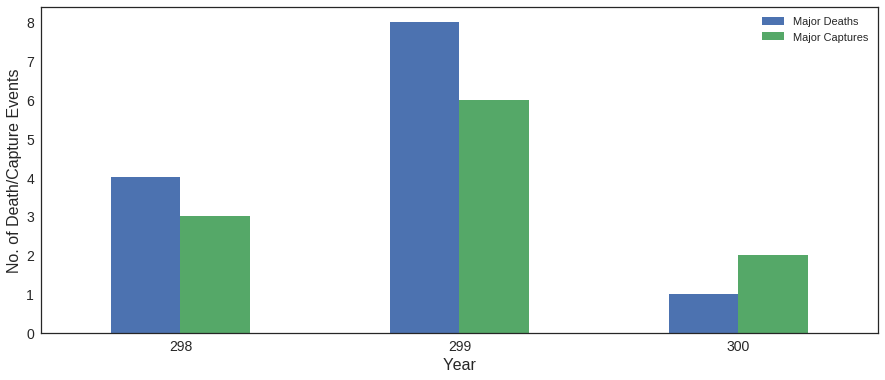

In [21]:
p = battles.groupby('year').sum()[["major_death", "major_capture"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("Year"), p.set_ylabel("No. of Death/Capture Events"), p.legend(["Major Deaths", "Major Captures"])

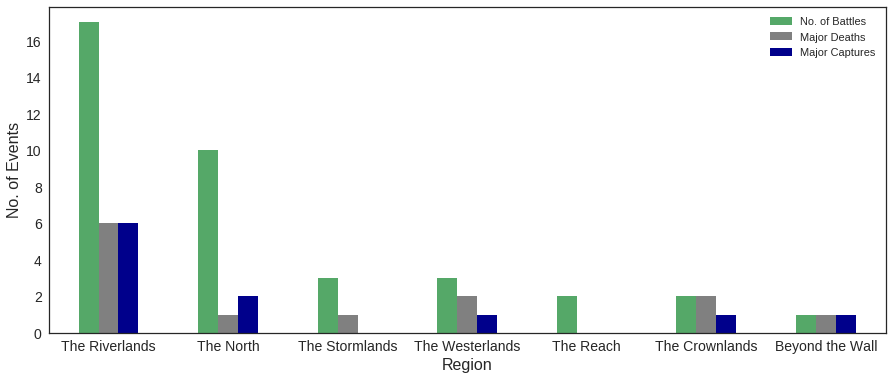

In [22]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]].sort_values("major_death", ascending = False).copy(deep = True)
p = battles.region.value_counts().to_frame().merge(
    data[["major_death"]], left_index = True, right_index = True).merge(
    data[["major_capture"]], left_index = True, right_index = True).plot(
    kind = 'bar', figsize = (15, 6), color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0)
_ = p.set_xlabel("Region"), p.set_ylabel("No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"])

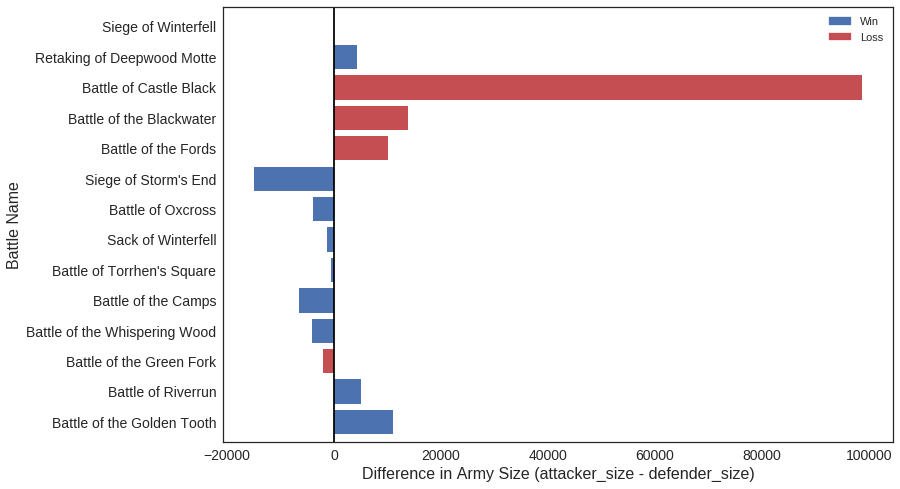

In [23]:
%matplotlib inline

data = battles.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)
data = (data.attacker_size - data.defender_size).to_frame().merge(battles.attacker_outcome.to_frame(), left_index = True, right_index = True)
data = data[data[0] != 0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
plt.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Win", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = plt.axvline(0, color = 'k'), plt.yticks(range(len(data)), battles.name.iloc[data.index].values)
_ = plt.xlabel("Difference in Army Size (attacker_size - defender_size)"), plt.ylabel("Battle Name")

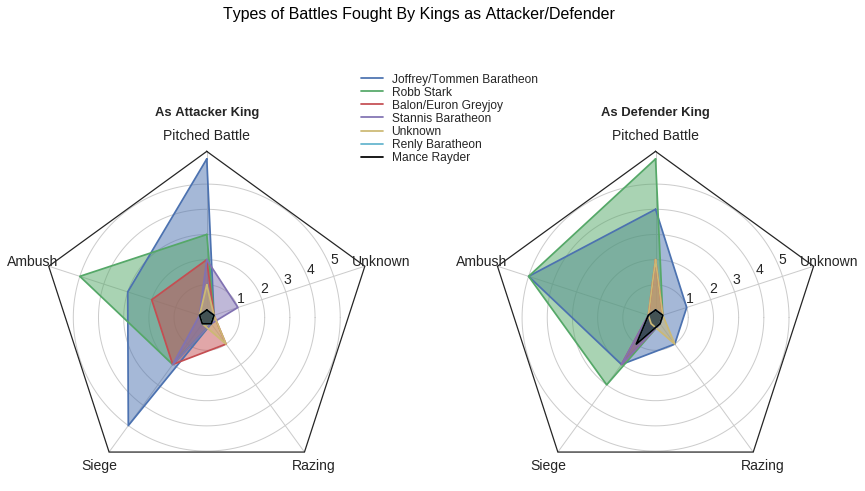

In [24]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

%matplotlib inline
def radar_factory(num_vars, frame = "circle"):
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint = False)
    theta += np.pi / 2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed = True, edgecolor = 'k')

    def draw_circle_patch(self):
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict: raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):
        name, RESOLUTION, draw_patch = 'radar', 1, patch_dict[frame]

        def fill(self, *args, **kwargs):
            closed = kwargs.pop("closed", True)
            return super(RadarAxes, self).fill(closed = closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines: self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == "circle": return PolarAxes._gen_axes_spines(self)
            spine_type, verts = "circle", unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}
    register_projection(RadarAxes)
    return theta

def unit_poly_verts(theta):
    x0, y0, r = [0.5] * 3
    verts = [(r * np.cos(t) + x0, r * np.sin(t) + y0) for t in theta]
    return verts

kings = list(battles.attacker_king.append(battles.defender_king).fillna("Unknown").unique())
battle_types = list(battles.battle_type.fillna("Unknown").str.title().unique())

def example_data():
    data = battles[["battle_type", "attacker_king", "defender_king", "name"]].copy(deep = True).fillna("Unknown")
    data.loc[:, "battle_type"] = data.battle_type.fillna("Unknown").str.title()
    grouped, ret_data = data.groupby(["attacker_king", "battle_type"]).count()[["name"]], [battle_types]
    ret_data.append(("As Attacker King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    grouped = data.groupby(["defender_king", "battle_type"]).count()[["name"]]
    ret_data.append(("As Defender King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    return ret_data

N = 5
theta, data = radar_factory(N, frame = "polygon"), example_data()
spoke_labels, fig = data.pop(0), plt.figure(figsize = (14, 14))
fig.subplots_adjust(wspace = 0.35, hspace = 0.20, top = 0.85, bottom = 0.05)
colors = sns.color_palette() + ["k"]
for n, (title, case_data) in enumerate(data):
    ax, _ = fig.add_subplot(2, 2, n + 1, projection = "radar"), plt.rgrids([1, 2, 3, 4, 5])
    ax.set_title(title, weight = "bold", position = (0.5, 1.1), horizontalalignment = "center", verticalalignment = "center", fontsize = 13.)
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color = color)
        ax.fill(theta, d, facecolor = color, alpha = 0.5)
    ax.set_varlabels(spoke_labels)
plt.subplot(2, 2, 1)
labels = kings
legend = plt.legend(labels, loc = (.95, .95), labelspacing = 0.1)
plt.setp(legend.get_texts(), fontsize = "large")
plt.figtext(0.5, 0.965, "Types of Battles Fought By Kings as Attacker/Defender", ha = "center", color = "k", size = 16.)
plt.show()

In [26]:
! pip install pivottablejs

In [27]:
from pivottablejs import pivot_ui
pivot_ui(battles)
